In [1]:
import pathlib
import pandas as pd
import plotnine as gg

In [2]:
data_dir = pathlib.Path("../cell-painting/2.train")

beta_file = pathlib.Path(f"{data_dir}/level4_training.csv")
vanilla_file = pathlib.Path(f"{data_dir}/level4_training_vanilla.csv")
mmd_file = pathlib.Path(f"{data_dir}/level4_training_mmd.csv")

beta_file_random = pathlib.Path(f"{data_dir}/level4_training_random.csv")
vanilla_file_random = pathlib.Path(f"{data_dir}/level4_training_vanilla_random.csv")
mmd_file_random = pathlib.Path(f"{data_dir}/level4_training_mmd_random.csv")

In [3]:
beta_df = pd.read_csv(beta_file, index_col=0).assign(model="beta", shuffled="real").reset_index().rename(columns={"index": "epoch"})
vanilla_df = pd.read_csv(vanilla_file, index_col=0).assign(model="vanilla", shuffled="real").reset_index().rename(columns={"index": "epoch"})
mmd_df = pd.read_csv(mmd_file, index_col=0).assign(model="mmd", shuffled="real").reset_index().rename(columns={"index": "epoch"})

beta_df_random = pd.read_csv(beta_file_random, index_col=0).assign(model="beta", shuffled="shuffled").reset_index().rename(columns={"index": "epoch"})
vanilla_df_random = pd.read_csv(vanilla_file_random, index_col=0).assign(model="vanilla", shuffled="shuffled").reset_index().rename(columns={"index": "epoch"})
mmd_df_random = pd.read_csv(mmd_file_random, index_col=0).assign(model="mmd", shuffled="shuffled").reset_index().rename(columns={"index": "epoch"})

In [4]:
df = pd.concat([beta_df, vanilla_df, mmd_df, beta_df_random, vanilla_df_random, mmd_df_random])

print(df.shape)
df.head()

(332, 11)


,epoch,loss,recon,kl,mmd,val_loss,val_recon,val_kl,val_mmd,model,shuffled
0,0,54.194080,53.509369,0.684606,0.0,11.426623,10.766972,0.659649,0.0,beta,real
1,1,7.643626,7.127049,0.516583,0.0,5.585779,5.052690,0.533087,0.0,beta,real
2,2,4.686048,4.233830,0.452215,0.0,4.052479,3.556772,0.495708,0.0,beta,real
3,3,3.271385,2.900027,0.371359,0.0,2.720083,2.361770,0.358312,0.0,beta,real
4,4,2.370878,2.074049,0.296831,0.0,1.943849,1.674222,0.269627,0.0,beta,real


In [5]:
df_melted = df.melt(id_vars=["epoch", "model", "shuffled"], value_vars=["loss", "val_loss"], var_name="loss_type", value_name="loss_value")
df_melted.head()

,epoch,model,shuffled,loss_type,loss_value
0,0,beta,real,loss,54.194080
1,1,beta,real,loss,7.643626
2,2,beta,real,loss,4.686048
3,3,beta,real,loss,3.271385
4,4,beta,real,loss,2.370878


In [6]:
df_melted.to_csv("training_curve_summary_data_level4.csv", index = False)

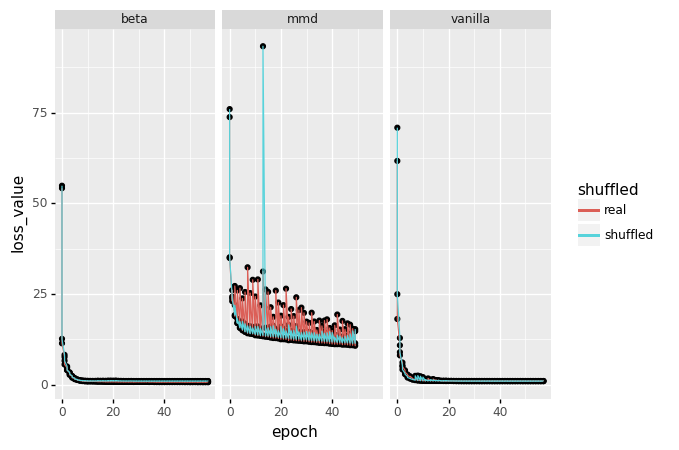

<ggplot: (8778735869017)>

In [7]:
(
    gg.ggplot(df_melted, gg.aes(x="epoch", y="loss_value"))
    + gg.geom_point()
    + gg.geom_line(gg.aes(color="shuffled"))
    + gg.facet_wrap("~model")
)